In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ACADEMIA/1. MSC DATA ANALYTICS COURSE/TERM III/Computer Vision and Artificial Intelligence/Customers.csv')

In [ ]:
print(df)

       Age  Income Student Credit_rating Buy_computer
0    young    high      no          fair           no
1    young    high      no     excellent           no
2   middle    high      no          fair          yes
3      old  medium      no          fair          yes
4      old     low     yes          fair          yes
5      old     low     yes     excellent           no
6   middle     low     yes     excellent          yes
7    young  medium      no          fair           no
8    young     low     yes          fair          yes
9      old  medium     yes          fair          yes
10   young  medium     yes     excellent          yes
11  middle  medium      no     excellent          yes
12  middle    high     yes          fair          yes
13     old  medium      no     excellent           no


In [ ]:
#Assign numerical value to the text values
d_age = {'young':0, 'middle': 1, 'old': 2}
d_income = {'high':0, 'medium': 1, 'low': 2}
d_student = {'no':0, 'yes': 1}
d_credit_rating = {'fair':0, 'excellent': 1}
d_buy_computer = {'no':0, 'yes': 1}

In [ ]:
#Mapping Heading with the assigned value
df['Age'] = df['Age'].map(d_age)
df['Income'] = df['Income'].map(d_income)
df['Student'] = df['Student'].map(d_student)
df['Credit_rating'] = df['Credit_rating'].map(d_credit_rating)
df['Buy_computer'] = df['Buy_computer'].map(d_buy_computer)

In [ ]:
print(df)

    Age  Income  Student  Credit_rating  Buy_computer
0     0       0        0              0             0
1     0       0        0              1             0
2     1       0        0              0             1
3     2       1        0              0             1
4     2       2        1              0             1
5     2       2        1              1             0
6     1       2        1              1             1
7     0       1        0              0             0
8     0       2        1              0             1
9     2       1        1              0             1
10    0       1        1              1             1
11    1       1        0              1             1
12    1       0        1              0             1
13    2       1        0              1             0


In [ ]:
features = ['Age', 'Income', 'Student', 'Credit_rating']

data = df[features]
classes = df['Buy_computer']

In [ ]:
print (data)
print('\n\n') #Print new line
print(classes)

    Age  Income  Student  Credit_rating
0     0       0        0              0
1     0       0        0              1
2     1       0        0              0
3     2       1        0              0
4     2       2        1              0
5     2       2        1              1
6     1       2        1              1
7     0       1        0              0
8     0       2        1              0
9     2       1        1              0
10    0       1        1              1
11    1       1        0              1
12    1       0        1              0
13    2       1        0              1



0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Buy_computer, dtype: int64


In [ ]:
df_validation = pd.read_csv('/content/drive/MyDrive/ACADEMIA/1. MSC DATA ANALYTICS COURSE/TERM III/Computer Vision and Artificial Intelligence/validation_set.csv')
print(df_validation)

       Age Income Student Credit_rating Buy_computer
0      old    low     yes          fair          yes
1      old   high      no          fair          yes
2    young    low      no     excellent           no
3   middle    low      no          fair           no
4      old    low     yes     excellent           no
5    young   high     yes     excellent          yes
6    young   high      no          fair          yes
7    young    low     yes          fair           no
8   middle   high     yes     excellent           no
9    young   high      no          fair          yes
10     old    low      no     excellent           no


In [ ]:
#Mapping Heading with the validation value
df_validation['Age'] = df_validation['Age'].map(d_age)
df_validation['Income'] = df_validation['Income'].map(d_income)
df_validation['Student'] = df_validation['Student'].map(d_student)
df_validation['Credit_rating'] = df_validation['Credit_rating'].map(d_credit_rating)
df_validation['Buy_computer'] = df_validation['Buy_computer'].map(d_buy_computer)
test_df = df_validation[features]

In [ ]:
print(test_df)

    Age  Income  Student  Credit_rating
0     2       2        1              0
1     2       0        0              0
2     0       2        0              1
3     1       2        0              0
4     2       2        1              1
5     0       0        1              1
6     0       0        0              0
7     0       2        1              0
8     1       0        1              1
9     0       0        0              0
10    2       2        0              1


In [ ]:
def euclidean_distance (point1, point2):
  return sum ((x-y) ** 2 for x, y in zip(point1, point2)) ** 0.5

In [ ]:
train_data = data.values
train_classes = classes.values
test_data = test_df.values
#k = 2
print(train_data)
print(train_classes)
print(test_data)
#print(k)

[[0 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [2 1 0 0]
 [2 2 1 0]
 [2 2 1 1]
 [1 2 1 1]
 [0 1 0 0]
 [0 2 1 0]
 [2 1 1 0]
 [0 1 1 1]
 [1 1 0 1]
 [1 0 1 0]
 [2 1 0 1]]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
[[2 2 1 0]
 [2 0 0 0]
 [0 2 0 1]
 [1 2 0 0]
 [2 2 1 1]
 [0 0 1 1]
 [0 0 0 0]
 [0 2 1 0]
 [1 0 1 1]
 [0 0 0 0]
 [2 2 0 1]]


In [ ]:
#def euclidean_distance(point1, point2):
  #return sum((x-y) ** 2 for x,y in zip (point1, point2)) ** 0.5

def knn(train_data, train_classes, test_data, k):
    predictions = []
    for test_point in test_data :
      # Calculate distances between the test point and all training points
      distances = [(euclidean_distance(test_point, train_point), train_class)
      for train_point, train_class in zip (train_data, train_classes)]

      # Sort distances in ascending order
      distances.sort()

      # Take the k-nearest neighbors
      k_nearest = distances[:k]

      # Get the classes of the k-nearest points
      k_nearest_classes = [cls for _, cls in k_nearest]

      # Make prediction based on the majority of class
      majority_class = max(set(k_nearest_classes), key = k_nearest_classes.count)
      predictions.append(majority_class)
    return predictions

# Step 3: Apply KNN on the given data
train_data = data.values
train_classes = classes.values

#Test data
test_data = test_df.values

# Set the value of k
k = 2

# Make predictions using KNN
predictions = knn(train_data, train_classes, test_data, k)

# Print the predictions
print("Predictions:", predictions)

Predictions: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
actual_classes =  df_validation ['Buy_computer'].values.tolist()
print(actual_classes)

[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]


In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual_classes, predictions)

In [ ]:
Accuracy = metrics.accuracy_score(actual_classes, predictions)
print(Accuracy)

0.6363636363636364


In [ ]:
cm_display = metrics.ConfusionMatrixDisplay (confusion_matrix= confusion_matrix, display_labels = [False, True])

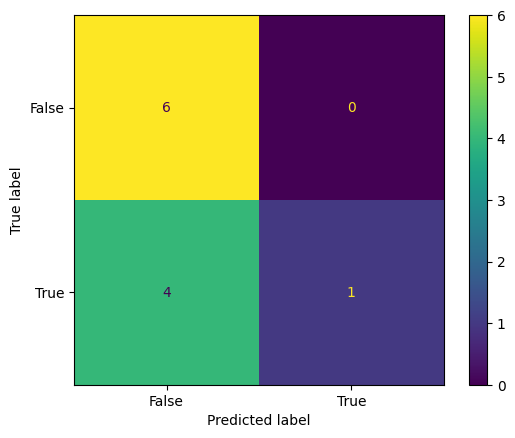

In [ ]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
pip install torch torchvision

In [ ]:
#Executing Pytorch Framework
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data_tensor = torch.FloatTensor (train_data)
labels_tensor = torch.LongTensor (train_classes)

In [ ]:
#Split the data into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(data_tensor, labels_tensor, test_size = 0.2, random_state = 42)

#Creating a model for Neural Networks
class SimpleNeuralNetwork(nn.Module):
  def __init__(self):
    super(SimpleNeuralNetwork, self).__init__()
    self.fc1 = nn.Linear (4,8)
    self.fc2 = nn.Linear (8,2)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

#Train the Neural Network
def train_neural_network (model, data_train, labels_train, epochs = 100, lr = 0.01):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr = lr) #SGD = Stochastic Gradient Descent
  for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(data_train)
    loss = criterion(outputs,labels_train)
    loss.backward()
    optimizer.step()

#Create and train the neural network
neural_network = SimpleNeuralNetwork()
train_neural_network(neural_network, data_train, labels_train)

#Test the Neural Network
def test_neural_network(model, data_test):
  outputs = model(data_test)
  _, predicted = torch.max(outputs.data, 1)
  return predicted

#Test the KNN algorithms
def test_knn (data_train, labels_train, data_test, k):
  knn = KNeighborsClassifier (n_neighbors = k)
  knn.fit(data_train, labels_train)
  return knn.predict(data_test)

#Convert tensor outputs to numpy arrays
predictions_neural_network = test_neural_network (neural_network, data_test).numpy()
predictions_knn = test_knn (data_train.numpy(), labels_train.numpy(), data_test.numpy(), k = 2)

#Calculate accuracy for both models
accuracy_neural_network = accuracy_score(labels_test.numpy(), predictions_neural_network)
accuracy_knn = accuracy_score(labels_test.numpy(), predictions_knn)
print("Accuracy of Neural Network: {:.2f}%".format(accuracy_neural_network * 100))
print("Accuracy of KNN: {:.2f}%".format(accuracy_knn * 100))

Accuracy of Neural Network: 100.00%
Accuracy of KNN: 66.67%


In [ ]:
#Execting Keras Framework
# convert the data and labels to pandas dataframes

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

df_data = data
df_labels = classes

#Split the data into trainiig and testing
data_train, data_test, labels_train, labels_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=42)

#Convert the labels into to one-hot encoding for keras
labels_train_keras = tf.keras.utils.to_categorical(labels_train, num_classes=2)
labels_test_keras = tf.keras.utils.to_categorical(labels_test, num_classes=2)

# Create the Neural Network using Keras
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(8, activation='relu', input_shape=(4,)),
      tf.keras.layers.Dense(2,activation='softmax')
])

#Compile the Neural Network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the NN
model.fit(data_train, labels_train_keras, epochs=500, batch_size=1, verbose=0)
# Test the NN
predictions_keras = model.predict(data_test)
predicted_labels_keras = np.argmax(predictions_keras, axis=1)

# Test the KNN algrtm
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data_train, labels_train)
predicted_labels_knn = knn.predict(data_test)

# Calculate Accuracy
accuracy_keras = accuracy_score(labels_test, predicted_labels_keras)
accuracy_knn = accuracy_score(labels_test, predicted_labels_knn)

print("Accuracy of Neural Network (Keras): {:2f}%".format(accuracy_keras * 100))
print("Accuracy of KNN: {:2f}%".format(accuracy_knn * 100))

1/1 [==============================] - 0s 68ms/step
Accuracy of Neural Network (Keras): 66.666667%
Accuracy of KNN: 66.666667%
